In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                              
# Author      : Dilan Castañeda                                             
# Created On  : October 05, 2024                                           
# Last Update : October 05, 2024                                         
# Version     : 1.0.0       

# Multiple Linear Regression and Prediction
# Interactive reading 4


### <font color='blue'> Name: Dilan Gonzalez Castaneda</font>
### <font color='blue'> ID: A00831905</font>

Welcome to the third week of this course. This time we will focus on linear regression, but to achieve this we will continue using the functions we learned last weeks. Each week we will add more lines of code to make our data analysis more complete. 

#### Development of the activity

For this activity we will include a dataset related to the Boston Housing data which was collected in 1978 and each of te 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

The dataset is available in the `sklean` python module. 
Number of instances: 506
Number of Attributes: 13 numeric/categorical predictive
Missing values: None

This is the list of variables we will be working with:
- `CRIM` per capita crime rate by town
- `ZN` proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` proportion of non-retail business acres per town
- `CHAS` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`  nitric oxides concentration (parts per 10 million)
- `RM` average number of rooms per dwelling
- `AGE` proportion of owner-occupied units built prior to 1940
- `DIS` weighted distances to five Boston employment centres
- `RAD`  index of accessibility to radial highways
- `TAX` full-value property-tax rate per 10000
- `PTRATIO` pupil-teacher ratio by town
- `B`  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT` % lower status of the population
- `MEDV`  Median value of owner-occupied homes in $1000's

Develop the following points in a Jupyter Notebook, trying, as much as possible, that each point is worked in a different cell. Comments in the code are always welcome, as they help a reader to understand more easily what the creator of the file programmed.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
# Dataset is not in sklearn, so we need to load it from a csv file https://github.com/selva86/datasets/blob/master/BostonHousing.csv
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Print the following information: shape, column names, column data type, missing values, descriptive statistics

<details>
    <summary>If you have problems, click here to show the solution</summary>
    data.shape<br>
    data.info()<br>
    data.describe()<br>
</details>


In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Do exploratory analysis of data visualization. Make at least one scatter plot between the output variable Price with each of the variables we have in the dataset. Which one do you consider has the highest positive linear relationship with the output? Try the exercise and then look at the solution.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    import seaborn as sns<br>
    import matplotlib.pyplot as plt<br>
    sns.pairplot(data=data,y_vars=['PRICE'], x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])<br>
    plt.show()<br>
    In another cell<br>
    plt.scatter(data.RM, data.PRICE)<br>
    plt.xlabel("Average number of rooms per dwelling (RM)")<br>
    plt.ylabel("Housing Price")<br>
    plt.title("Relationship between RM and Price")<br>
    plt.grid()<br>
    plt.show()<br>
</details>


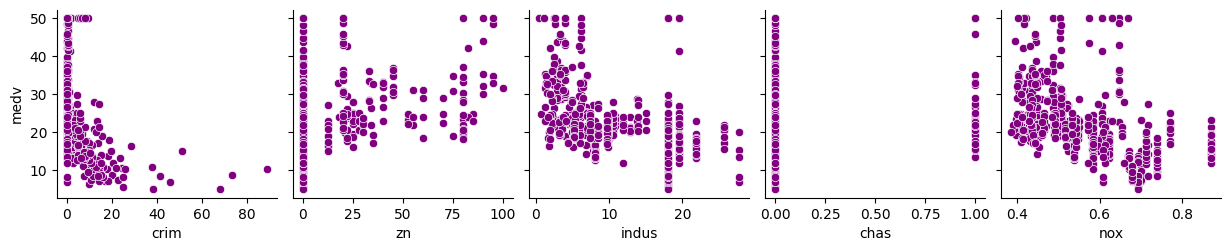

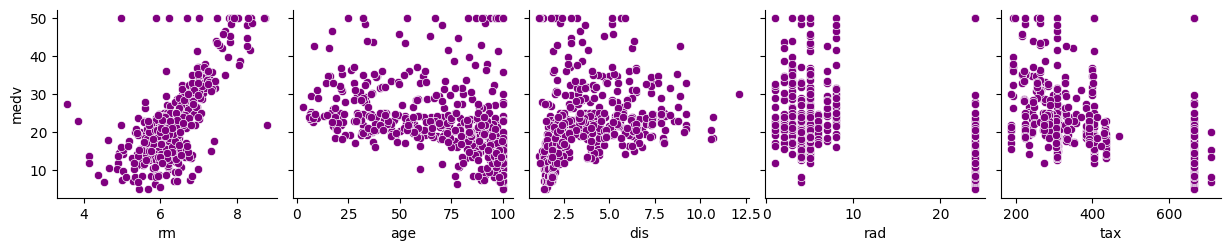

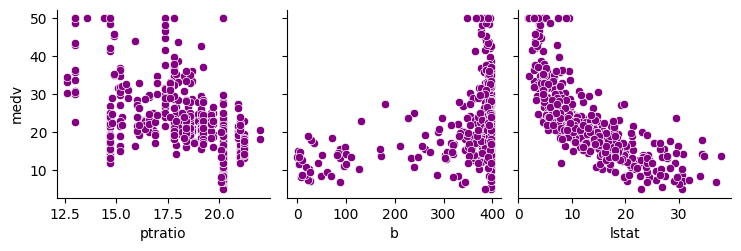

In [7]:
vars = data.columns
vars = vars.drop('medv')
n = 5
for i in range(0, len(vars), n):
    sns.pairplot(data=data, y_vars=['medv'], x_vars=vars[i:i+n], plot_kws={'color': 'purple'})
    plt.show()

In [8]:
print("Based on the pairplot, we can see that the variable 'rm' has a positive correlation with the target variable 'medv' and it's the onde with a lower error.")

Based on the pairplot, we can see that the variable 'rm' has a positive correlation with the target variable 'medv' and it's the onde with a lower error.


## Multiple Linear Regression

Import `statsmodels.api as sm`. Then define as `x` all the features except PRICE and as `y` the variable `PRICE`. Then run the function as it is in the cell.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    import statsmodels.api as sm<br>
    x = data.drop(['PRICE'],axis=1)<br>
    y = data.PRICE<br>
    X = sm.add_constant(x)<br>
    model = sm.OLS(y,X)<br>
    results = model.fit()<br>
    results.summary()<br>
</details>

In [9]:
x = data[data.columns.difference(['medv'])]
y = data['medv']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          6.72e-135
Time:                        20:23:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
b              0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observed an R-squared of 0.741, indicating that 74.1% of the variability of the dependent variable `PRICE` is explained by the features in the dataset. 

Print your thoughts on these results.

In the following cells print the p-values with the function `pvalues` in the variable `results`. It also prints the Residual Standard Error with the `scale**.5` function on the variable `results`.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    print(results.pvalues)<br>
    print(results.scale**.5)<br>
</details>

In [10]:
print("I think that these values can be affected by the amount of variables used. May be a good idea to use a subset of the variables to get a better model. Considereing the p-values.")

I think that these values can be affected by the amount of variables used. May be a good idea to use a subset of the variables to get a better model. Considereing the p-values.


In [11]:
results.pvalues

const      3.283438e-12
age        9.582293e-01
b          5.728592e-04
chas       1.925030e-03
crim       1.086810e-03
dis        6.013491e-13
indus      7.382881e-01
lstat      7.776912e-23
nox        4.245644e-06
ptratio    1.308835e-12
rad        5.070529e-06
rm         1.979441e-18
tax        1.111637e-03
zn         7.781097e-04
dtype: float64

In [12]:
results.scale**.5

4.7452981816996305

Do we need all the variables in the model? If we check the p-values the INDUS and Age variables are not significant. When we do machine learning models an important issue is overfitting and inter-epretability. Fewer variables makes the model easier to interpret. Do the same process but this time remove the INDUS and AGE variables from the model.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    import statsmodels.api as sm<br>
    x = data.drop(['PRICE','INDUS','AGE'],axis=1)<br>
    y = data.PRICE<br>
    X = sm.add_constant(x)<br>
    model = sm.OLS(y,X)<br>
    results = model.fit()<br>
    results.summary()<br>
</details>

In [13]:
x = data[data.columns.difference(['medv', 'age', 'indus'])]
y = data['medv']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          5.54e-137
Time:                        20:23:17   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
b              0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do you see it? The R squared is still the same, this model is better in that respect. Imagine the resources a company can spend to calculate a variable when it is not even relevant to the model.

In [14]:
print("Yes in this case is a better thing to reduce the complexity of the model without losing accuracy and saving computational resources.")

Yes in this case is a better thing to reduce the complexity of the model without losing accuracy and saving computational resources.


## Multiple Linear Regresion for Prediction

Separate the data frame into training data and test data with a 70/30 ratio. That is, 70% of the data will be used to train the model and the rest to validate its results. Make sure that the partitioning is random, it is not a good practice to simply take the first observations for training and the last ones for testing. Print the dimensions or shape of both data sets. Check and make sure that the number of observations in both data sets add up to the original number of data.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    from sklearn.model_selection import train_test_split<br>
    train, test = train_test_split(data, train_size = 0.7)<br>
    print("Train:", train.shape)<br>
    print("Test:", test.shape)<br>

</details>


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print("Train size: ", x_train.shape)
print("Test size: ", x_test.shape)

Train size:  (354, 11)
Test size:  (152, 11)


Train a multiple linear regression model, so that all system variables except INDUS and AGE try to predict “PRICE”. Print on the screen a summary of the model, clearly showing the estimated coefficient of each variable, as well as its associated p-value, among other things. It is likely that the p-values will be displayed as 0.000, in which case, manually print the exact values of these metrics (remember the `pvalues` attribute).

<details>
    <summary>If you have problems, click here to show the solution</summary>
    x = train.drop(['PRICE','INDUS','AGE'], axis = 1)<br>
    y = train.PRICE<br>
    model = sm.OLS(y, sm.add_constant(x))<br>
    results = model.fit()<br>
    print(results.summary())<br>
    print(results.pvalues)<br>

</details>

In [16]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X)
results = model.fit()
print(results.pvalues)
results.summary()

const      5.022162e-10
b          4.034277e-04
chas       1.536681e-03
crim       2.580246e-02
dis        1.627530e-13
lstat      2.567701e-16
nox        1.383535e-07
ptratio    1.584225e-11
rad        1.946422e-05
rm         6.904003e-16
tax        2.259844e-03
zn         5.693159e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     98.68
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           5.21e-99
Time:                        20:23:17   Log-Likelihood:                -1045.0
No. Observations:                 354   AIC:                             2114.
Df Residuals:                     342   BIC:                             2160.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9842      6.244      6.403      0.000      27.702      52.266
b              0.0110      0.003      3.573      0.000       0.005       0.017
chas           3.2286      1.011      3.193      0.002       1.240       5.217
crim          -0.0979      0.044     -2.239      0.026      -0.184      -0.012
dis           -1.8484      0.241     -7.686      0.000      -2.321      -1.375
lstat         -0.4901      0.057     -8.618      0.000      -0.602      -0.378
nox          -23.2652      4.324     -5.380      0.000     -31.771     -14.760
ptratio       -1.0848      0.156     -6.975      0.000      -1.391      -0.779
rad            0.3149      0.073      4.332      0.000       0.172       0.458
rm             4.1255      0.487      8.479      0.000       3.168       5.082
tax           -0.0116      0.004     -3.077      0.002      -0.019      -0.004
zn             0.0458      0.016      2.783      0.006       0.013       0.078
==============================================================================
Omnibus:                      101.404   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.152
Skew:                           1.211   Prob(JB):                     1.04e-83
Kurtosis:                       7.477   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results shown in the table, indicate whether you consider that there is at least one significant variable in the model. Additionally, indicate specifically which specific variable or variables have a significant linear association with the output and which you would consider to be the most important variable in the model. Console print each of these statements as text, but clearly indicate which metric you are relying on to reach each conclusion.

In [17]:
print("lsat and rm are the variables with the lowest p-values, so they are the most significant variables in the model. ")
print("However, the variable with the higher negative influence is 'nox' and with positive influence is 'rm'.")

lsat and rm are the variables with the lowest p-values, so they are the most significant variables in the model. 
However, the variable with the higher negative influence is 'nox' and with positive influence is 'rm'.


Calculate the residual standard error and the R2 of the model, both for the training data and for the validation data and print these values in the console. For the calculation of the metrics in the training set, I recommend using the attributes 'scale' (and take the square root) and 'rsquared'.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    XTest = test.drop(['PRICE','INDUS','AGE'], axis = 1)<br>
    yhatTest = results.predict(sm.add_constant(XTest))<br>
    YTest = test.PRICE<br>
    RSSTest = sum((YTest-yhatTest)**2)<br>
    TSSTest = sum((YTest-np.mean(YTest))**2)<br>
    nTest = XTest.shape[0]<br>
    mTest = XTest.shape[1]<br>
    RSETest = np.sqrt(RSSTest/(nTest-mTest-1))<br>
    R2Test = 1 - RSSTest / TSSTest<br>
    print("Validation Data Set")<br>
    print("RSE:", RSETest)<br>
    print("R2:", R2Test)<br>

</details>

In [18]:
# Predictions for both train and test data
y_train_pred = results.predict(sm.add_constant(x_train))
y_test_pred = results.predict(sm.add_constant(x_test))

# Calculate RSE for train data
train_residuals = y_train - y_train_pred
train_rse = np.sqrt(np.sum(np.square(train_residuals)) / (x_train.shape[0] - x_train.shape[1]))

# Calculate RSE for test data
test_residuals = y_test - y_test_pred
test_rse = np.sqrt(np.sum(np.square(test_residuals)) / (x_test.shape[0] - x_test.shape[1]))

# Calculate R2 for train data
train_r2 = 1 - (np.sum(np.square(train_residuals)) / np.sum(np.square(y_train - np.mean(y_train))))

# Calculate R2 for test data
test_r2 = 1 - (np.sum(np.square(test_residuals)) / np.sum(np.square(y_test - np.mean(y_test))))

# Print the results
print(f"Training RSE: {train_rse}")
print(f"Testing RSE: {test_rse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

Training RSE: 4.70630274474981
Testing RSE: 5.120949516862642
Training R²: 0.7604136964998425
Testing R²: 0.6625277982184123


Finally, let's try to visualize the obtained results. Generate a scatter plot that has the actual value of Y for the validation data set on the x-axis, and that has the estimated value of Y, according to the model, for the same data set on the y-axis. Ideally, if the model were perfect, you would have a straight line with a slope of 1 (45 degrees), since the actual value and the estimated value would be identical. This is a qualitative way to evaluate the quality of our model, the more the points resemble a straight line, the better.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    plt.scatter(YTest, yhatTest, color="r")<br>
    plt.xlabel("Y real")<br>
    plt.ylabel("Y predicted")<br>
    p1 = max(max(YTest),max(yhatTest))<br>
    p2 = min(min(YTest),min(yhatTest))<br>
    plt.plot([p1,p2],[p1,p2],'b-',linestyle='dashed')<br>
    plt.grid()<br>
    plt.show()

</details>

C:\Users\dilan\AppData\Local\Temp\ipykernel_23536\1173307331.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "p-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'p-', linestyle='dashed', label="Perfect Prediction Line")


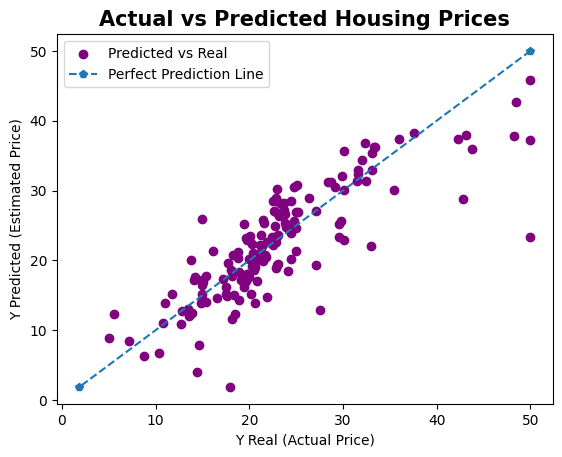

In [25]:
plt.scatter(y_test, y_test_pred, color="purple", label="Predicted vs Real")
plt.xlabel("Y Real (Actual Price)")
plt.ylabel("Y Predicted (Estimated Price)")
plt.title("Actual vs Predicted Housing Prices", fontsize=15, weight='bold')
p1 = max(max(y_test), max(y_test_pred))
p2 = min(min(y_test), min(y_test_pred))
plt.plot([p1, p2], [p1, p2], 'p-', linestyle='dashed', label="Perfect Prediction Line")
plt.grid(False)
plt.legend()
plt.show()

I hope you liked this activity, it made you resolve doubts and made you more interested in the world of data science.

Write and print your reflections on this activity using the print function. Think about how you could use it in the future and which tools or functions you liked the most.

In [27]:
print("I've done this before but I think that this approach was way faster and easier to understand.")
print("I think that the model is good enough to make predictions, but it can be improved by adding more variables or using a different model.")

I've done this before but I think that this approach was way faster and easier to understand.
I think that the model is good enough to make predictions, but it can be improved by adding more variables or using a different model.
